### Take grayscale image of size 512x512, add some salt & pepper noise and perform the following  operations – 
###  (a) Apply average and median spatial filters with 5x5 mask and observe their performance for noise suppression in term of PSNR

In [55]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

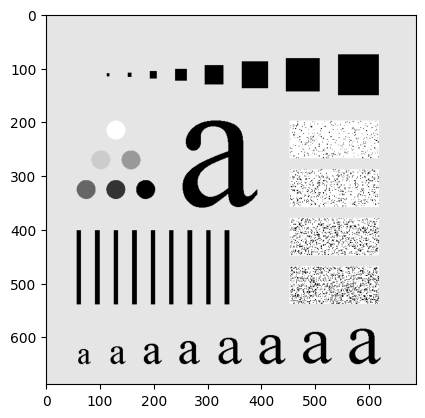

In [56]:
image = cv2.imread('./../../Images/Characters Test Pattern 688x688.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()

In [57]:
def add_salt_pepper_noise(image, percent_salt, percent_pepper):
    noisy_image = image.copy()
    salt_amount = (image.shape[0] * image.shape[1]) * (percent_salt / 100)
    pepper_amount = (image.shape[0] * image.shape[1]) * (percent_pepper / 100)

    for k in range(int(salt_amount)):
        index = []
        for x in range(2):
            index.append(np.random.randint(0, image.shape[x]))
        noisy_image[index[0], index[1]] = 255

    for k in range(int(pepper_amount)):
        index = []
        for x in range(2):
            index.append(np.random.randint(0, image.shape[x]))
        noisy_image[index[0], index[1]] = 0

    return noisy_image

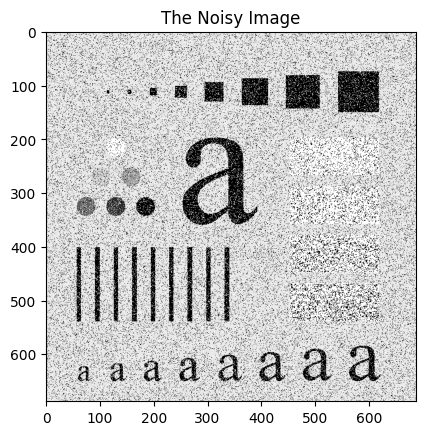

In [63]:
noisy_image = add_salt_pepper_noise(image, 15, 10)
plt.imshow(noisy_image, cmap='gray')
plt.title("The Noisy Image")
plt.show()

In [59]:
def filter(image, kernel_size, type = 'average'):
    if type == 'average':
        fn = np.mean
    elif type == 'median':
        fn = np.median

    kernel = np.ones(kernel_size)
    padx = kernel_size[0] // 2
    pady = kernel_size[1] // 2

    padded_image = np.zeros((image.shape[0]+2*padx, image.shape[1]+2*pady))
    padded_image[padx : image.shape[0]+padx, pady : image.shape[1]+pady] = image

    new_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            subsec = padded_image[i:i+kernel_size[0], j:j+kernel_size[1]]
            new_image[i,j] = fn(subsec*kernel)
    return new_image.astype(np.uint8)

In [60]:
def psnr(image, noisy_image):
    image = image.astype(np.float32)
    noisy_image = noisy_image.astype(np.float32)
    return 10 * math.log10(256**2 / np.mean(np.power(image - noisy_image, 2)))

18.284522036227642


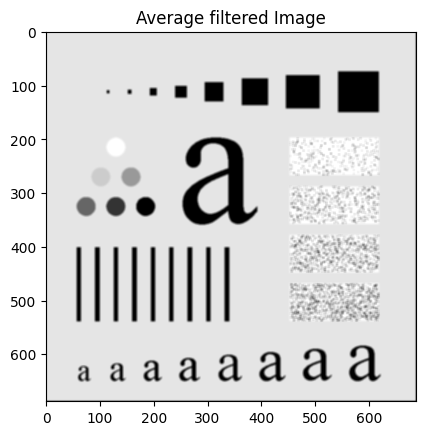

In [61]:
average_filter = filter(image, kernel_size=(5,5))
print(psnr(image, average_filter))
plt.imshow(average_filter, cmap='gray')
plt.title("Average filtered Image")
plt.show()

18.91837822947326


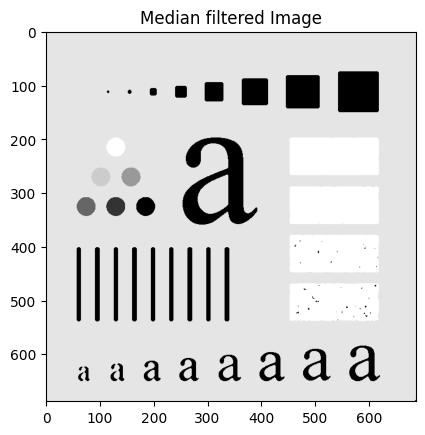

In [62]:
median_filter = filter(image, kernel_size=(5,5), type='median')
print(psnr(image, median_filter))
plt.imshow(median_filter, cmap='gray')
plt.title("Median filtered Image")
plt.show()